In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Define tickers and date range
tickers = [
    'AAPL', 'MSFT', 'NVDA', 'AMZN', 'GOOGL',
    'META', 'TSLA', 'BRK-B', 'JPM', 'V',
    'SAP.DE', 'SIE.DE', 'ALV.DE', 'VOW3.DE', 'LIN.DE',
    'MC.PA', 'OR.PA', 'AIR.PA', 'ASML.AS', 'NESN.SW'
]
start_date = '2010-01-01'
end_date = '2025-04-30'

# Download adjusted close prices
data = yf.download(tickers, start=start_date, end=end_date, group_by='ticker', auto_adjust=True)

# Extract Close prices
close_data = data['Close'] if 'Close' in data else data.xs('Close', axis=1, level=1)

# Drop columns with mostly missing data and forward fill
close_data = close_data.dropna(axis=1, thresh=int(0.8 * len(close_data)))
close_data.ffill(inplace=True)

# Compute summary statistics
summary = pd.DataFrame(index=close_data.columns)
summary['Min'] = close_data.min()
summary['Max'] = close_data.max()
summary['Mean'] = close_data.mean()
summary['Median'] = close_data.median()
summary['Std Dev'] = close_data.std()

# Add volatility label
def label_volatility(std):
    if std > 100:
        return 'Very High'
    elif std > 50:
        return 'High'
    elif std > 20:
        return 'Moderate'
    else:
        return 'Low'

summary['Volatility Label'] = summary['Std Dev'].apply(label_volatility)

# Round values
summary = summary.round(2)

# Sort by Mean
summary_sorted = summary.sort_values(by='Mean', ascending=False)

# Display the full DataFrame
pd.set_option('display.max_rows', None)
print(summary_sorted)


[*********************100%***********************]  20 of 20 completed

           Min     Max    Mean  Median  Std Dev Volatility Label
Ticker                                                          
MC.PA    55.64  858.37  306.59  201.84   238.93        Very High
ASML.AS  22.00  990.14  249.06  121.80   252.04        Very High
OR.PA    55.67  448.77  199.91  160.64   116.19        Very High
BRK-B    64.94  537.72  199.30  176.00   108.67        Very High
META     17.63  735.45  195.33  167.27   145.02        Very High
LIN.DE   35.89  443.95  145.84   64.16   121.51        Very High
MSFT     17.42  464.00  135.08   67.62   129.48        Very High
V        14.72  362.11  123.94   97.95    89.07             High
ALV.DE   29.53  346.74  122.34  120.23    66.54             High
VOW3.DE  32.74  184.48  101.27  101.45    25.80         Moderate
TSLA      1.05  479.86   86.66   18.61   112.28        Very High
SIE.DE   31.70  243.00   84.51   73.61    41.50         Moderate
JPM      19.49  276.90   84.10   74.14    55.26             High
SAP.DE   24.43  277.79   

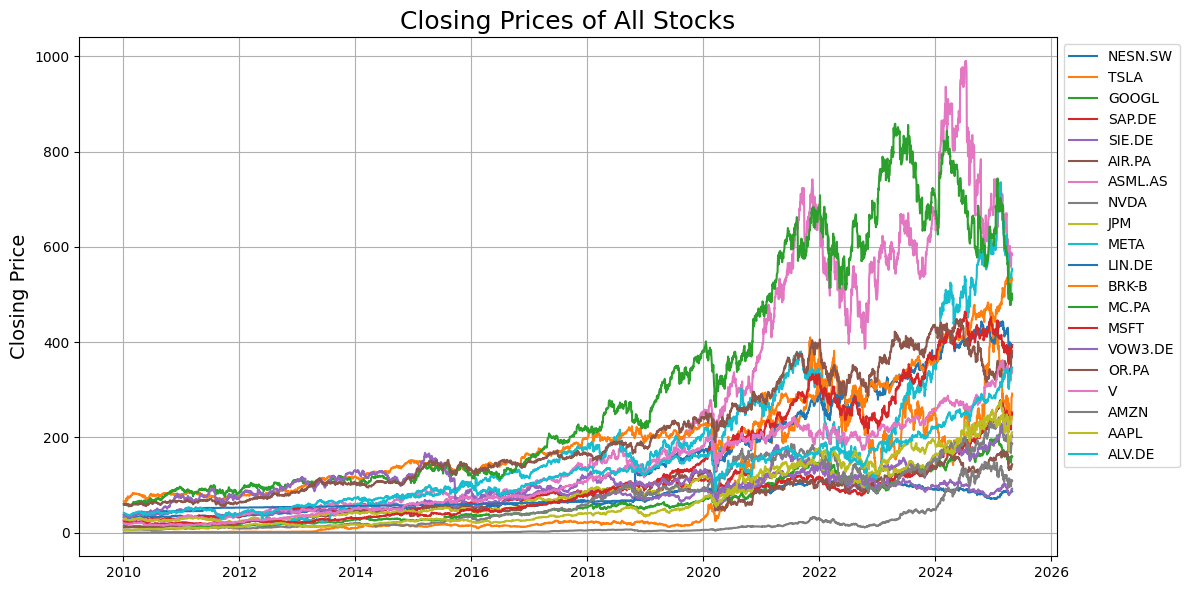

In [6]:
plt.figure(figsize=(12, 6))

for ticker in close_data.columns:
    plt.plot(close_data.index, close_data[ticker], label=ticker)

plt.ylabel('Closing Price', fontsize=14)
plt.title('Closing Prices of All Stocks', fontsize=18)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()


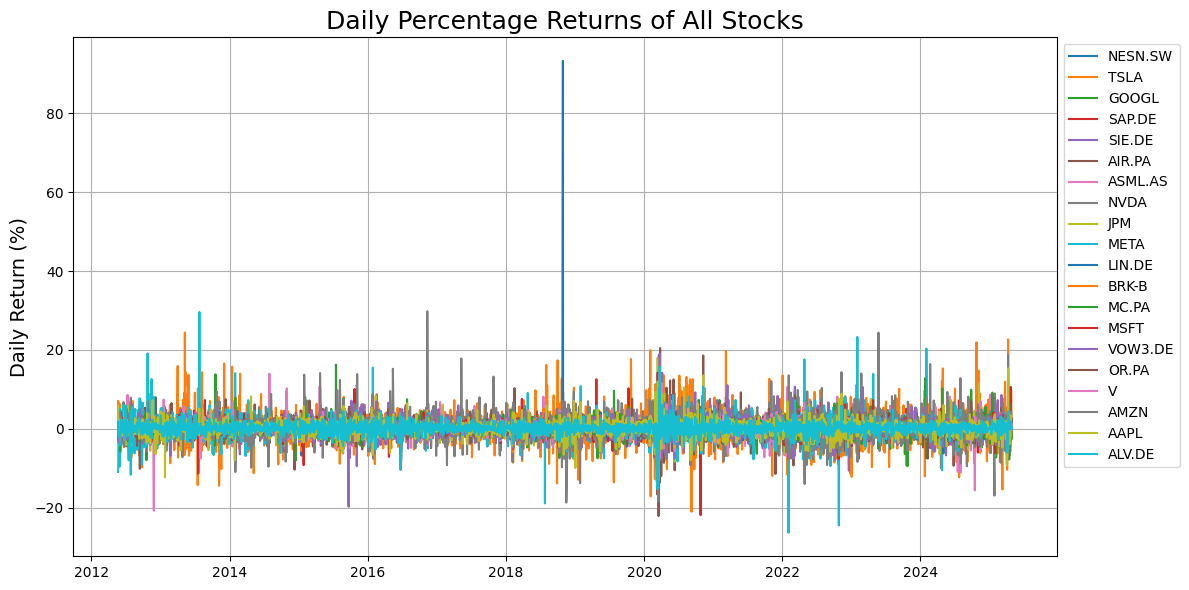

In [8]:
returns = close_data.pct_change().mul(100).dropna()

plt.figure(figsize=(12, 6))
for ticker in returns.columns:
    plt.plot(returns.index, returns[ticker], label=ticker)

plt.ylabel('Daily Return (%)', fontsize=14)
plt.title('Daily Percentage Returns of All Stocks', fontsize=18)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()
